<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/NLP1_PM/DLtesting_nov28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install ftfy
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
import sklearn.neighbors._base

import imblearn
from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Reshape, Embedding, LSTM,  TimeDistributed, Bidirectional, Lambda, Input, Add, GlobalMaxPool1D
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

from itertools import islice

import re
import nltk
from nltk.corpus import stopwords

from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.utils import resample

import pickle, string

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import spacy

# import nlpaug.augmenter.char as nac
# import nlpaug.augmenter.word as naw
# import nlpaug.augmenter.sentence as nas
# import nlpaug.flow as nafc

# from nlpaug.util import Action

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

! pip install langdetect
from langdetect import detect
from langdetect import detect
!pip install goslate
from goslate import Goslate
!pip install spacy
from collections import defaultdict
from bs4 import BeautifulSoup
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [17]:
dataset = pd.read_excel('/content/sample_data/df_DetermApplived_GroupMerged_forDL_PriyaM.xlsx')

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7860 non-null   int64  
 1   Short description     7851 non-null   object 
 2   Description           7845 non-null   object 
 3   Caller                7860 non-null   object 
 4   Assignment group      7860 non-null   object 
 5   New Assignment Group  7860 non-null   object 
 6   combined_description  7860 non-null   object 
 7   pred_group            0 non-null      float64
 8   Language              7860 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 552.8+ KB


In [19]:
dataset = dataset.drop(columns='Unnamed: 0',axis=1)

In [20]:
dataset.head()

,Short description,Description,Caller,Assignment group,New Assignment Group,combined_description,pred_group,Language
0,login issue,verified user details. employee and manager na...,spxjnwir pjlcoqds,GRP_0,GRP_0,login issue verified user details employee an...,NaN,en
1,outlook,team my meetings/skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,GRP_0,outlook team my meetings/skype meetings etc ar...,NaN,en
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,GRP_0,cant log in to vpn hi i cannot log on to vpn best,NaN,en
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,GRP_0,unable to access hr tool page unable to access...,NaN,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,GRP_0,skype error skype error,NaN,no


In [22]:
dataset['target'] = dataset['New Assignment Group'].astype('category').cat.codes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     7851 non-null   object 
 1   Description           7845 non-null   object 
 2   Caller                7860 non-null   object 
 3   Assignment group      7860 non-null   object 
 4   New Assignment Group  7860 non-null   object 
 5   combined_description  7860 non-null   object 
 6   pred_group            0 non-null      float64
 7   Language              7860 non-null   object 
 8   target                7860 non-null   int8   
dtypes: float64(1), int8(1), object(7)
memory usage: 499.1+ KB


In [23]:
# # # Creating Output dimension ('num_class')
num_class_all = len(np.unique(dataset['target'].values))
num_class_all

48

In [34]:
dataset_without_aug =dataset.copy()

In [35]:
gloveFileName = '/content/sample_data/glove.6B.200d.txt'

In [36]:
# #Tokenizing and Padding the Independent features

from tensorflow.python.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH = 300
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset_without_aug.combined_description	)
post_seq = tokenizer.texts_to_sequences(dataset_without_aug.combined_description.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [37]:
#Creating input dimension ('vocab_size')

vocab_size = len(tokenizer.word_index) + 1
max_features = vocab_size 
vocab_size

12144

In [38]:
y = dataset_without_aug['target']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.2, random_state=42)

In [40]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((6288, 300), (1572, 300), (6288,), (1572,))

In [41]:
# # # Creating Output dimension ('num_class')
num_class = len(np.unique(y_train.values))
num_class

48

In [42]:
max_features = vocab_size  
maxlen = 200
seq_output_size = 128
filters = 64
kernel_size = 5
pool_size = 4
activation_func = 'sigmoid'

In [44]:
from keras import layers
# For Embedding Layer
from keras.layers.embeddings import Embedding


# Bi directional LSTM
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Dropout(0.2)(x)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(num_class, activation='softmax')(x)
# Add a classifier
bilstm_model = keras.Model(inputs, outputs)
bilstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         1554432   
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0     

In [45]:
bilstm_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
bilstm_model.fit(X_train, y_train, batch_size=20, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
315/315 [==============================] - 104s 297ms/step - loss: 2.2450 - acc: 0.5165 - val_loss: 1.9737 - val_acc: 0.5337
Epoch 2/7
315/315 [==============================] - 92s 291ms/step - loss: 1.8134 - acc: 0.5608 - val_loss: 1.9042 - val_acc: 0.5681
Epoch 3/7
315/315 [==============================] - 92s 292ms/step - loss: 1.6017 - acc: 0.5903 - val_loss: 1.8999 - val_acc: 0.5642
Epoch 4/7
315/315 [==============================] - 92s 291ms/step - loss: 1.4283 - acc: 0.6128 - val_loss: 1.9147 - val_acc: 0.5293
Epoch 5/7
315/315 [==============================] - 92s 292ms/step - loss: 1.2665 - acc: 0.6490 - val_loss: 1.9513 - val_acc: 0.5363
Epoch 6/7
315/315 [==============================] - 92s 292ms/step - loss: 1.1358 - acc: 0.6823 - val_loss: 2.0016 - val_acc: 0.5585
Epoch 7/7
315/315 [==============================] - 92s 292ms/step - loss: 1.0092 - acc: 0.7061 - val_loss: 2.0529 - val_acc: 0.5604


In [46]:
bi_lstm_predicted = bilstm_model.predict(X_test)
bi_lstm_predicted = np.argmax(bi_lstm_predicted, axis=1)
accuracy_score(y_test, bi_lstm_predicted)

0.5604325699745547

**DL With augementation - part 1**

In [47]:
!pip install nlpaug

     |████████████████████████████████| 409 kB 5.2 MB/s 
     |████████████████████████████████| 11.3 MB 40.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [48]:

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action


In [49]:
dataset_with_aug =dataset.copy()

In [50]:
dataset_with_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     7851 non-null   object 
 1   Description           7845 non-null   object 
 2   Caller                7860 non-null   object 
 3   Assignment group      7860 non-null   object 
 4   New Assignment Group  7860 non-null   object 
 5   combined_description  7860 non-null   object 
 6   pred_group            0 non-null      float64
 7   Language              7860 non-null   object 
 8   target                7860 non-null   int8   
dtypes: float64(1), int8(1), object(7)
memory usage: 499.1+ KB


In [51]:
dataset_with_aug['target'].value_counts()

0     3660
46     591
16     285
47     252
4      251
11     213
12     209
22     197
41     182
5      143
2      139
38     128
6      116
17     115
25     103
21      97
30      95
10      88
45      88
8       84
24      67
26      62
18      55
20      44
32      40
31      40
23      39
33      37
7       36
35      35
13      33
1       31
3       30
15      27
36      27
37      25
43      25
44      21
9       19
29      19
19      17
42      16
28      15
34      15
39      14
14      13
27      11
40      11
Name: target, dtype: int64

In [52]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(dataset_with_aug.combined_description, 
                                                    dataset_with_aug.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', X_test.shape, y_test.shape)

Shape of the training set: (6288,) (6288,)
Shape of the test set: (1572,) (1572,)


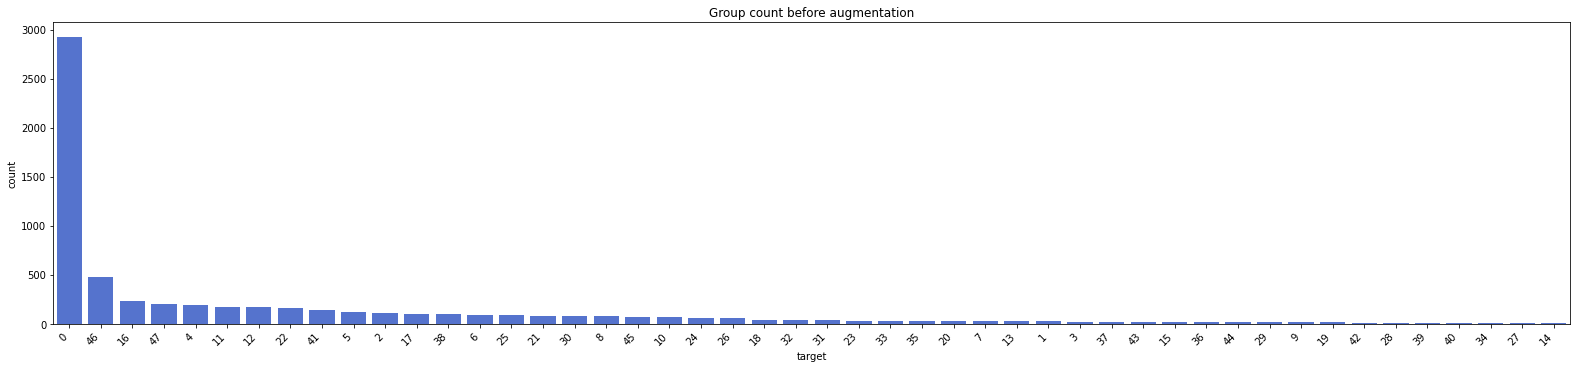

In [53]:
#Create Dataset 
y_train_df_old = pd.DataFrame(y_train,columns=['target'])
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df_old['target'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='target', data=y_train_df_old, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count before augmentation')
plt.show()

In [119]:
##Create Dataset for 'others' i.e all groups which is not part of GRP_0
#y_train_df_old = pd. DataFrame(target,columns=['target'])
#y_train_df_old_nogrp0 = y_train_df_old[y_train_df_old['target'] != 0]

# descending_order = y_train_df_old_nogrp0['target'].value_counts().sort_values(ascending=False).index
# plt.subplots(figsize=(22,5))
# #add code to rotate the labels
# ax=sns.countplot(x='target', data=y_train_df_old_nogrp0, color='royalblue',order=descending_order)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# plt.tight_layout()
# plt.title('Group count before augmentation excluding GRP_0')
# plt.show()

In [55]:
#import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [56]:
aug = naw.SynonymAug(aug_src='wordnet',aug_max=3)

In [57]:
# Take an example for augmentation
example=aug.augment(X_train[5],n=2)
print('\033[1mOriginal text:\033[0m')
print(X_train[5])
print('_'*100)
print('\033[1mAugmented text:\033[0m')
print(example[0])
print(example[1])

Original text:
unable to log in to engineering tool and skype unable to log in to engineering tool and skype
____________________________________________________________________________________________________
Augmented text:
unable to log in to engineering pecker and skype unable to log in to engineering tool and skype
unable to log in to engineering tool and skype unable to lumber in to engineering puppet and skype


In [58]:
augmented_sentences=[]
augmented_sentences_labels=[]
for i in X_train.index:
  if y_train[i] in (24,9,12,2,19,3,6):
    temps=aug.augment(X_train[i],n=3)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (13,10,5,25,14,4,29,33,16,18,31,7,17,26,34):    
    temps=aug.augment(X_train[i],n=6)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (72,57,54,66,69,73,35,64,70,71):    
    temps=aug.augment(X_train[i],n=50)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] not in (0,8,24,9,12,2,19,3,6,13,10,5,25,14,4,29,33,16,18,31,7,17,26,34,72,57,54,66,69,73,35,64,70,71):    
    temps=aug.augment(X_train[i],n=12)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])

In [59]:
X_train=X_train.append(pd.Series(augmented_sentences),ignore_index=True)
y_train=y_train.append(pd.Series(augmented_sentences_labels),ignore_index=True)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(36272,)
(36272,)
(1572,)
(1572,)


In [60]:
y_train_df = pd. DataFrame(y_train,columns=['target'])


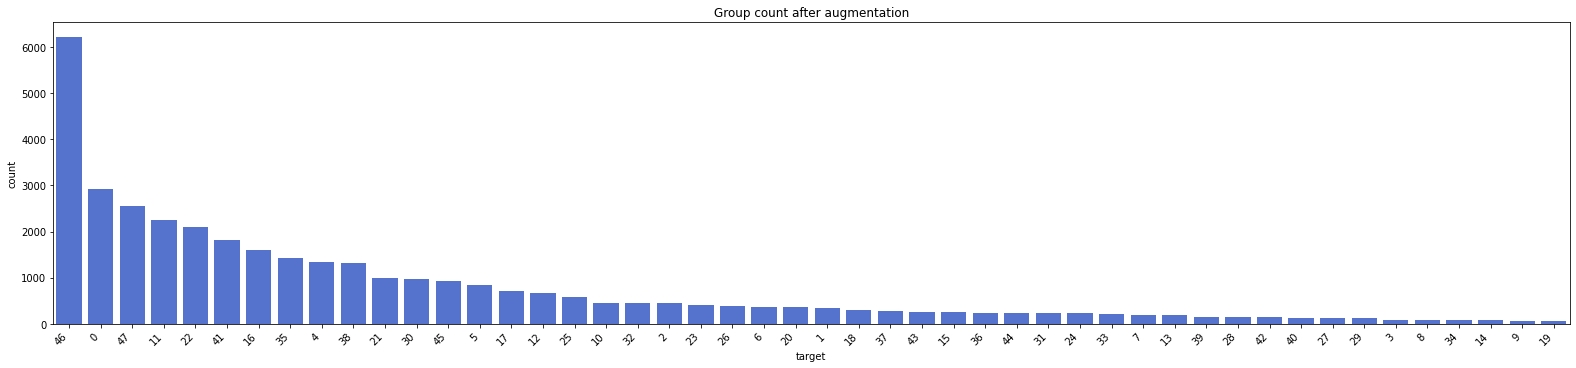

In [61]:
#Create Dataset 
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df['target'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='target', data=y_train_df, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count after augmentation')
plt.show()

In [117]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
#y_train_df_old = pd. DataFrame(y_train_df,columns=['target'])
#y_train_df_nogrp0 = y_train_df[y_train_df['target'] != 0]

# descending_order = y_train_df_nogrp0['target'].value_counts().sort_values(ascending=False).index
# plt.subplots(figsize=(22,5))
# #add code to rotate the labels
# ax=sns.countplot(x='target', data=y_train_df_nogrp0, color='royalblue',order=descending_order)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# plt.tight_layout()
# plt.title('Group count after augmentation excluding GRP_0')
# plt.show()

In [62]:
y_train_df.groupby(['target']).size()

target
0     2927
1      338
2      440
3       88
4     1330
5      840
6      368
7      196
8       74
9       56
10     455
11    2249
12     676
13     189
14      70
15     247
16    1603
17     707
18     287
19      52
20     364
21     988
22    2106
23     416
24     224
25     588
26     378
27     130
28     156
29     119
30     962
31     231
32     442
33     217
34      70
35    1428
36     234
37     273
38    1313
39     156
40     130
41    1807
42     156
43     260
44     234
45     923
46    6227
47    2548
dtype: int64

In [63]:
#Tokenizing and Padding the Independent features

from tensorflow.python.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH = 300
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.values)
post_seq = tokenizer.texts_to_sequences(X_train.values)
post_seq_padded_Xtrain = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [64]:
#Creating input dimension ('vocab_size')

vocab_size = len(tokenizer.word_index) + 1
max_features = vocab_size 
vocab_size

14096

In [65]:
#Tokenizing and Padding the Independent features

from tensorflow.python.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH = 300
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test.values)
post_seq = tokenizer.texts_to_sequences(X_test.values)
post_seq_padded_Xtest = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [66]:
num_class = len(np.unique(y_train.values))
num_class

48

In [67]:
num_class_test = len(np.unique(y_test.values))
num_class_test

48

In [68]:
max_features = vocab_size  
maxlen = 200
seq_output_size = 128
filters = 64
kernel_size = 5
pool_size = 4
activation_func = 'sigmoid'

In [69]:
from keras import layers
# For Embedding Layer
from keras.layers.embeddings import Embedding


# Bi directional LSTM
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Dropout(0.2)(x)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(num_class, activation='softmax')(x)
# Add a classifier
bilstm_model = keras.Model(inputs, outputs)
bilstm_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 128)         1804288   
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128)               0   

In [70]:
#model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
bilstm_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
bilstm_model.fit(post_seq_padded_Xtrain, y_train, batch_size=20, epochs=7, validation_data=(post_seq_padded_Xtest, y_test))

Epoch 1/7
1814/1814 [==============================] - 497s 270ms/step - loss: 1.8966 - acc: 0.4643 - val_loss: 5.2908 - val_acc: 0.1749
Epoch 2/7
1814/1814 [==============================] - 490s 270ms/step - loss: 0.8668 - acc: 0.7340 - val_loss: 7.0104 - val_acc: 0.1266
Epoch 3/7
1814/1814 [==============================] - 492s 271ms/step - loss: 0.5653 - acc: 0.8186 - val_loss: 7.1947 - val_acc: 0.1603
Epoch 4/7
1814/1814 [==============================] - 491s 271ms/step - loss: 0.4531 - acc: 0.8487 - val_loss: 7.6162 - val_acc: 0.1393
Epoch 5/7
1814/1814 [==============================] - 493s 272ms/step - loss: 0.3913 - acc: 0.8646 - val_loss: 8.0394 - val_acc: 0.1807
Epoch 6/7
1814/1814 [==============================] - 492s 271ms/step - loss: 0.3585 - acc: 0.8728 - val_loss: 7.7060 - val_acc: 0.1947
Epoch 7/7
1814/1814 [==============================] - 492s 271ms/step - loss: 0.3330 - acc: 0.8789 - val_loss: 8.2947 - val_acc: 0.1539


In [71]:
bi_lstm_predicted = bilstm_model.predict(post_seq_padded_Xtest)
bi_lstm_predicted = np.argmax(bi_lstm_predicted, axis=1)
accuracy_score(y_test, bi_lstm_predicted)

0.15394402035623408